In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("BigMart_sales.csv")

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


1. Identify the number of rows and columns

In [5]:
df.shape   # there are 8523 rows and 12 columns

(8523, 12)

2. How many columns are there, and a brief description of each

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Columns Description
- Item_Identifier: Unique ID assigned to each product/item.
- Item_Weight: Weight of the item (in kilograms); some values are missing.
- Item_Fat_Content: Describes whether the item has low fat or regular fat content.
- Item_Visibility: The percentage of total display area of all products in a store allocated to this item.
- Item_Type: Category of the item (e.g., Dairy, Snack Foods, etc.).
- Item_MRP: Maximum Retail Price of the item.
- Outlet_Identifier: Unique ID assigned to each store/outlet.
- Outlet_Establishment_Year: Year when the store was established.
- Outlet_Size: Size of the store (e.g., Small, Medium, High). Some values are missing.
- Outlet_Location_Type: Type of city where the store is located (e.g., Tier 1, Tier 2, Tier 3).
- Outlet_Type: Type of store (e.g., supermarket, grocery store, etc.).
- Item_Outlet_Sales: Sales of the item in the particular store - this is the target variable.

### Problem Statement
- Analyze the data and understand the factors impacting the sales in each outlet
- Identify the anomalies and trends in the data using charts and visuals
- Handle missing and outliers with appropriate techniques

### Understanding the data
- Check for missing values and their distribution across variables, as missing data can significantly affect the quality and reliability of your analysis.
- Identify the data types and formats for each variable, as this information is essential for subsequent data manipulation and analysis steps.
- Look for any obvious errors or inconsistencies in the data, such as invalid values, mismatched units, or outliers, which could indicate data quality issues.

In [8]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Missing values are found in item_weight columns (1463 as a count and 17%) and outlet size (2410, approx. 28%). 
Missing data can significantly affect the quality and reliability of our analysis and therefore needs to be handled during the process.

- Identify the data types and formats for each variable, as the information is essential for subsequent missing data. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. The categorical columns are Items_Fat_Content, Outlet_Size, Outlet_Location_type, Outlet_Type
2. Numerical columns: Items_Weight_Item, Item_Visibilty, Item_MRP, Outlet_Establishment_Year, Item_Outlet_sales

- Check for duplicates records, inconsistencies in the sales

In [10]:
df.duplicated().sum()  # there are no duplicates found

0

In [11]:
categorical_columns = df.select_dtypes(include = "object").columns    #to create a subset of categorical features
numerical_columns = df.select_dtypes(include = ["int64", "float64"]).columns  #to create a subset of numerical features

In [12]:
categorical_columns, numerical_columns

(Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
       dtype='object'))

In [13]:
for cat in categorical_columns:
    print(f"Unique values and their counts int {cat}")
    print(df[cat].value_counts())
    print("*******************************")

Unique values and their counts int Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
*******************************
Unique values and their counts int Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
*******************************
Unique values and their counts int Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood          

In [14]:
### Data in column fat content has to be fixed: Convert LF and Low fat to Low Fat and reg to Regular
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"reg" : "Regular", "LF" : "Low Fat", "low fat" : "Low Fat"})

In [15]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [16]:
# Combine all supermarket types into supermarket
df["Outlet_Type"] = df["Outlet_Type"].replace({"Supermarket Type1" : "Supermarket", 
                                               "Supermarket Type2" : "Supermarket", 
                                               "Supermarket Type3" : "Supermarket"})

In [17]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket      7440
Grocery Store    1083
Name: count, dtype: int64

In [18]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Handling the Missing Values

In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
df[df["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [21]:
df["Item_Weight"].mean(), df["Item_Weight"].median()

(12.857645184135976, 12.6)

In [22]:
df["Outlet_Size"].mode()[0]

'Medium'

In [23]:
## LEt us use Median imputation for Item_Weight and mode imputation of Outlet_Size for handling the missing values
df.fillna({"Item_Weight" : df["Item_Weight"].median(), "Outlet_Size" : df["Outlet_Size"].mode()[0]}, inplace = True)

In [24]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Perform **Univariate Analysis** with distribution plots/countplots
**Univariate analysis** is the simplest form of data analysis. It involves analysing data with only one variable to understand its distribution, central tendency, and dispersion

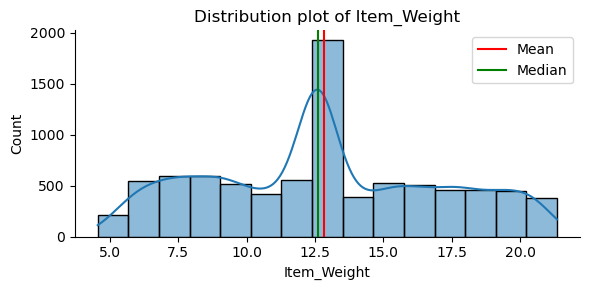

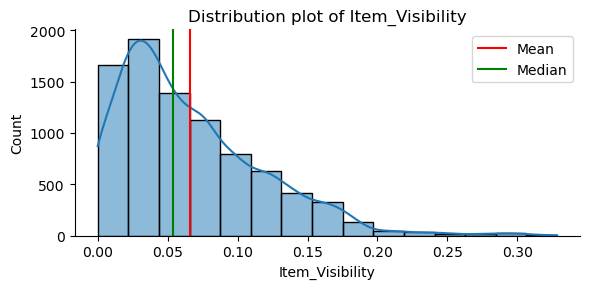

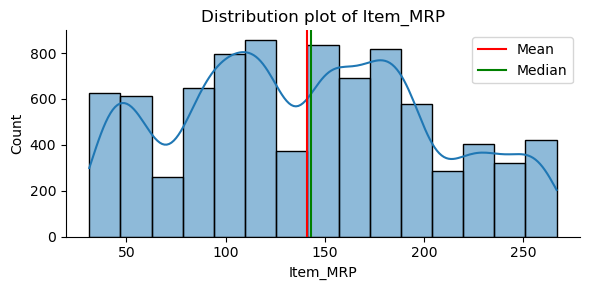

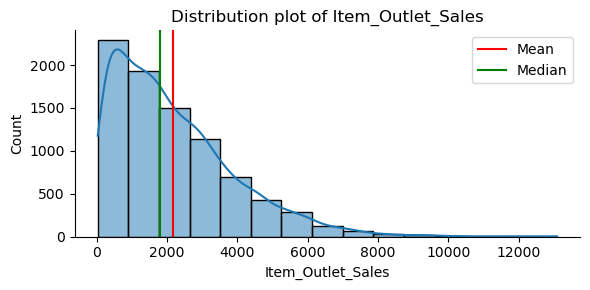

In [52]:
#### Distribution plots for numerical columns
for num in numerical_columns:
    if num != "Outlet_Establishment_Year":
        sns.displot(data = df, x = num, bins = 15, height = 3, aspect = 2, kde = True)
        plt.axvline(df[num].mean(), label = "Mean", c = "red")
        plt.axvline(df[num].median(), label = "Median", c = "green")
        plt.title(f"Distribution plot of {num}")
        plt.legend()
        plt.show()

- Item outlet sales and Item visibility is positively skewed
- Not a clear pattern in Item_Weight and Item_MRP although the data seems symmetrical
- The majority of the Item_Weights are around 12 units.
- MRP values seem to follow approximately uniform distribution.

<Figure size 400x400 with 0 Axes>

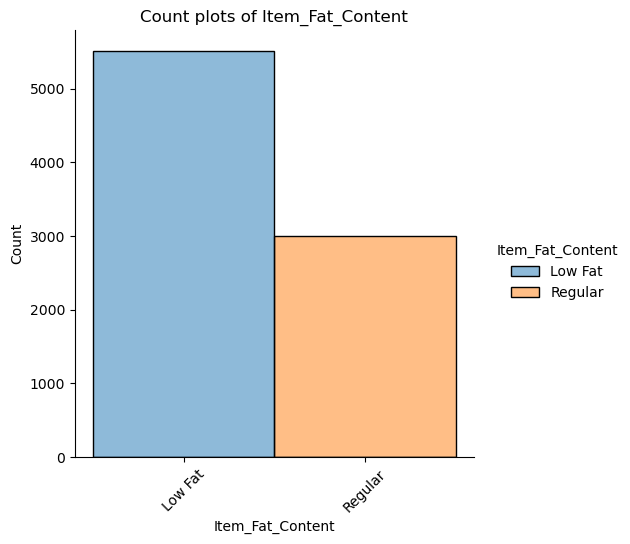

<Figure size 400x400 with 0 Axes>

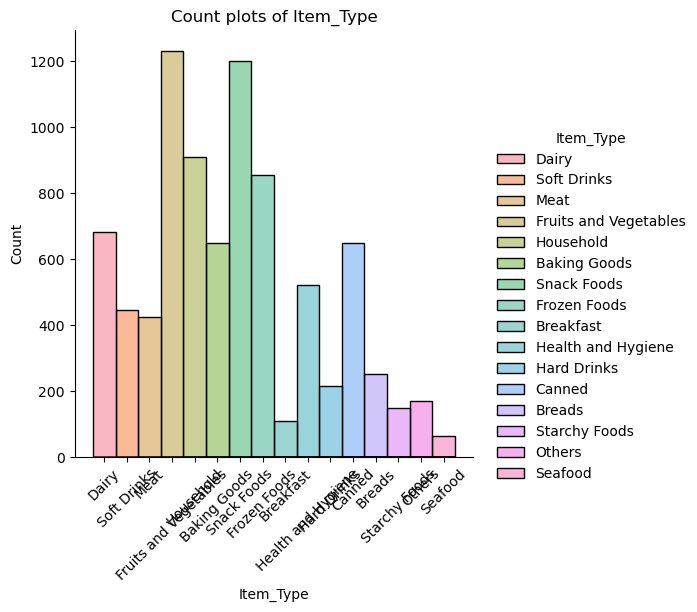

<Figure size 400x400 with 0 Axes>

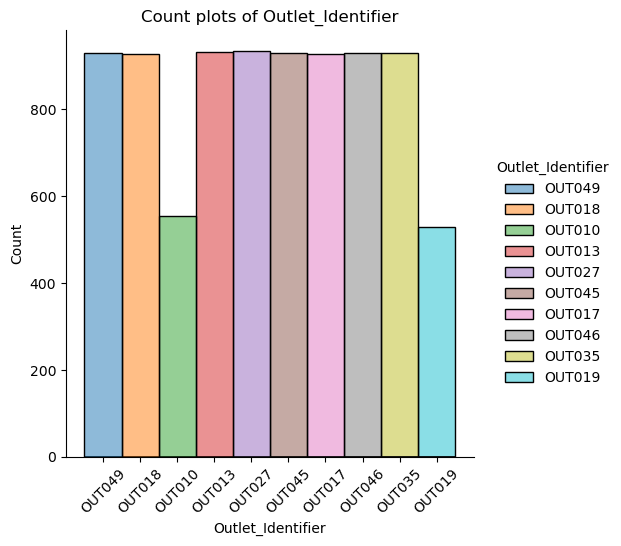

<Figure size 400x400 with 0 Axes>

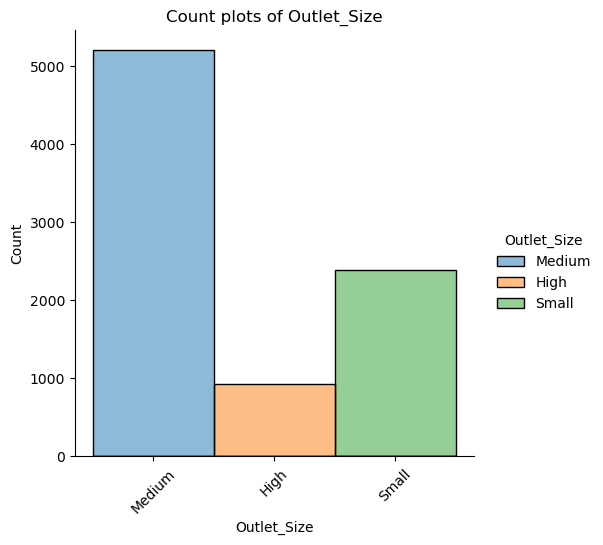

<Figure size 400x400 with 0 Axes>

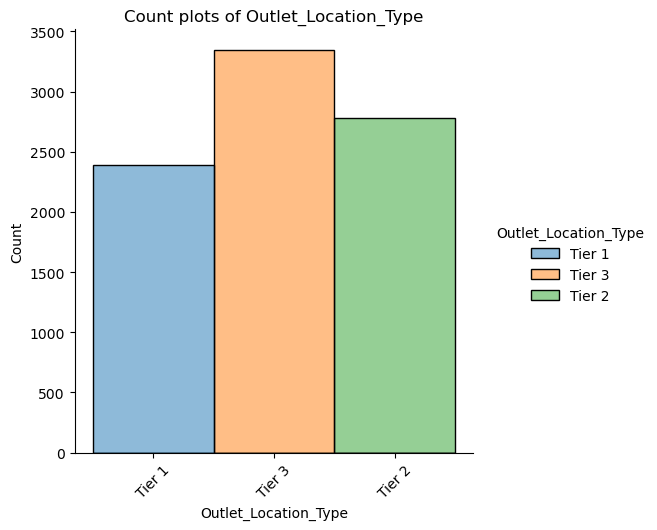

<Figure size 400x400 with 0 Axes>

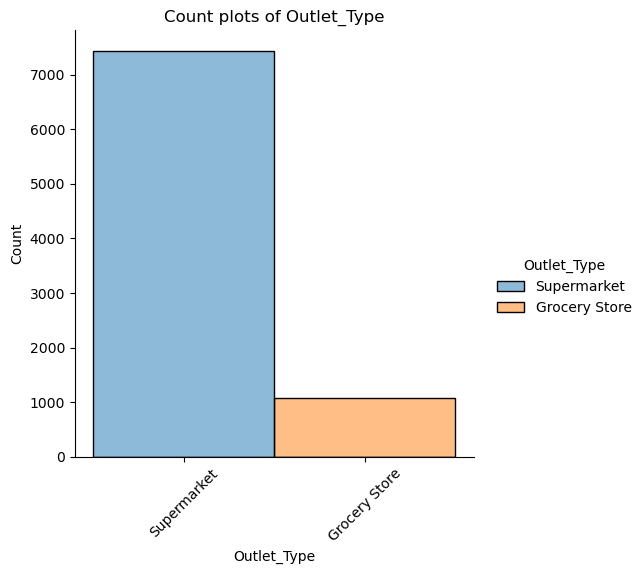

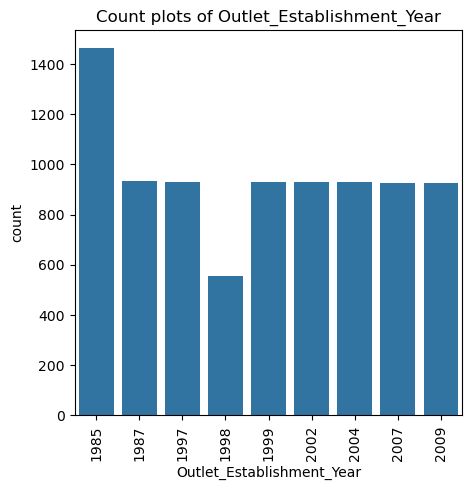

In [31]:
## Create countplots for all categorical columns including establishment year
for cat in categorical_columns:
    if cat != "Item_Identifier":
        plt.figure(figsize = (4, 4))
        sns.displot(data = df, x = cat, hue = cat)
        plt.title(f"Count plots of {cat}")
        plt.xticks(rotation = 45)
        plt.show()
plt.figure(figsize = (5,5))
sns.countplot(data = df, x ="Outlet_Establishment_Year")
plt.title("Count plots of Outlet_Establishment_Year")
plt.xticks(rotation = 90)
plt.show()

- Low fat items are more in count as compared to regular
- Fruits and vegetables and snacks are fast-selling items compared to other item types
- The highest number of outlets were established in 1985 (Not a significant growth post 1985)
- Supermarket type is far higher in count as compared to groceries.
- Tier 3 has a greater number of data points.
- Medium outlet size is more frequent as compared to small and large sizes.

In [25]:
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')